<a href="https://colab.research.google.com/github/sudhakarkothuru/Exploratory-Data-Analysis-on-Hotel-Bookings/blob/main/Exploratory_Data_Analysis_on_Hotel_Bookings_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [272]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Importing Data*** 

In [273]:
## importing the data 
working_dir_path='/content/drive/My Drive/capstone project/Hotel Bookings.csv'
df=pd.read_csv(working_dir_path)
## displaying the data
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [274]:
## show the first 5 rows of the data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [275]:
## show the last 5 rows of the data
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [276]:
## show the columns of the data
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [277]:
# show the type of data that present 
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

***Cleaning and Processing Data***

In [278]:
## Finding the null and NaN values from data
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [279]:
## Finding duplicated values from the Data
df.duplicated().sum()

31994

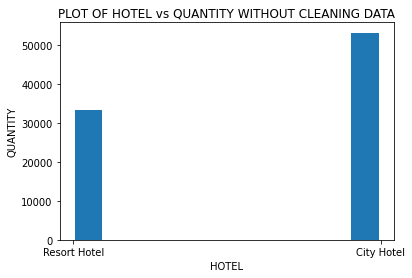

In [334]:
##plot for hotel and quantity
plt.hist(df['hotel'],rwidth=0.9)
plt.title('PLOT OF HOTEL vs QUANTITY WITHOUT CLEANING DATA')
plt.xlabel('HOTEL')
plt.ylabel('QUANTITY')
plt.show()

In [281]:
## droping the some columns
df=df.drop(columns=['agent','company','arrival_date_year','reservation_status_date'])
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out


In [282]:
## droping the duplicated values
df=df.drop_duplicates()
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out


In [283]:
## count the values
df.count()

hotel                             87123
is_canceled                       87123
lead_time                         87123
arrival_date_month                87123
arrival_date_week_number          87123
arrival_date_day_of_month         87123
stays_in_weekend_nights           87123
stays_in_week_nights              87123
adults                            87123
children                          87119
babies                            87123
meal                              87123
country                           86672
market_segment                    87123
distribution_channel              87123
is_repeated_guest                 87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
reserved_room_type                87123
assigned_room_type                87123
booking_changes                   87123
deposit_type                      87123
days_in_waiting_list              87123
customer_type                     87123
adr                               87123


In [284]:
## checing null values
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           451
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

In [285]:
## droping the null values
df=df.dropna()
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [286]:
##checking for null and missing data
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [287]:
##  display processed data
df
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000
mean,0.273884,80.033623,26.839514,15.817741,1.007592,2.628883,1.878583,0.139452,0.010846,0.039346,0.030057,0.177263,0.272523,0.735727,106.604624,0.083710,0.700801
std,0.445953,85.990822,13.654389,8.834580,1.028408,2.041877,0.626190,0.457155,0.113670,0.194417,0.369813,1.720550,0.728841,9.891722,54.987661,0.280802,0.832121
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.550000,0.000000,0.000000
75%,1.000000,125.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


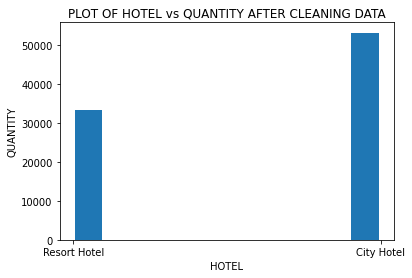

In [335]:
## histogram plot for hotel and quantity with processed data
plt.hist(df['hotel'],rwidth=0.9)
plt.title('PLOT OF HOTEL vs QUANTITY AFTER CLEANING DATA')
plt.xlabel('HOTEL')
plt.ylabel('QUANTITY')
plt.show()

***finding the outiers***

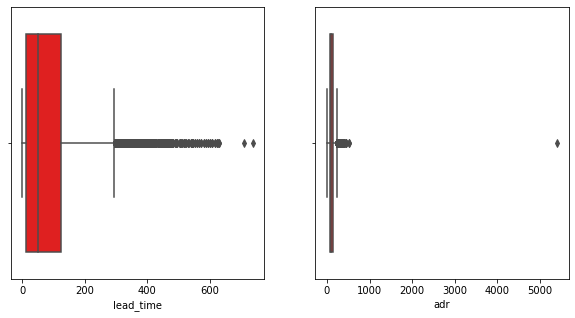

In [340]:
## finding the outiers
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['lead_time'], color='red')
plt.subplot(1,2,2)
sns.boxplot(x=df['adr'], color='red')
plt.show()


***Removing the outliers from the Data***

In [290]:
## removing the outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print('internal quartile range',IQR)
df1=df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
df1.shape

internal quartile range is_canceled                         1.00
lead_time                         113.00
arrival_date_week_number           21.00
arrival_date_day_of_month          15.00
stays_in_weekend_nights             2.00
stays_in_week_nights                3.00
adults                              0.00
children                            0.00
babies                              0.00
is_repeated_guest                   0.00
previous_cancellations              0.00
previous_bookings_not_canceled      0.00
booking_changes                     0.00
days_in_waiting_list                0.00
adr                                61.85
required_car_parking_spaces         0.00
total_of_special_requests           1.00
dtype: float64


(39525, 28)

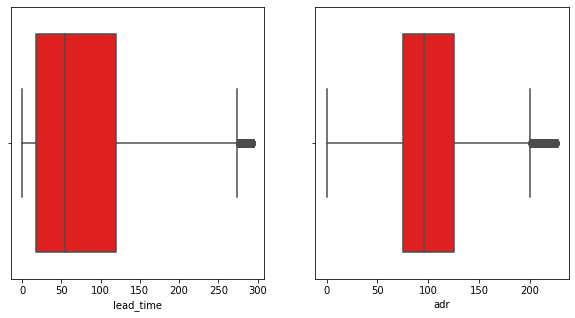

In [341]:
## check for the plot without outliers
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=df1['lead_time'], color='red')
plt.subplot(1,2,2)
sns.boxplot(x=df1['adr'], color='red')
plt.show()

***Data Visualization***

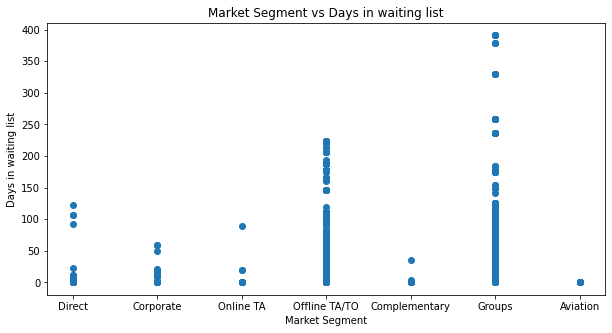

In [343]:
## plot  b/w market segment and days in waiting list
fig,x1=plt.subplots(figsize=(10,5))
plt.title('Market Segment vs Days in waiting list')
x1.scatter(df['market_segment'], df['days_in_waiting_list'])
x1.set_xlabel('Market Segment')
x1.set_ylabel('Days in waiting list')
plt.show()


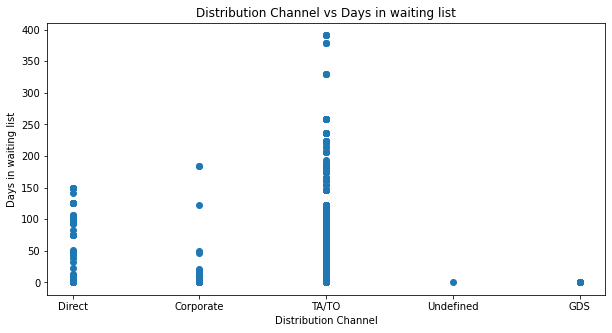

In [344]:
## plot b/w distributiob channel and days in waiting list
fig,x1=plt.subplots(figsize=(10,5))
plt.title('Distribution Channel vs Days in waiting list')
x1.scatter(df['distribution_channel'], df['days_in_waiting_list'])
x1.set_xlabel('Distribution Channel')
x1.set_ylabel('Days in waiting list')
plt.show()

In [294]:
## grouping of columns
grp=df.groupby('arrival_date_month')
a=grp['lead_time'].agg(np.mean)
b=grp['stays_in_week_nights'].agg(np.mean)
c=grp['stays_in_weekend_nights'].agg(np.mean)
d=grp['booking_changes'].agg(np.mean)
e=grp['days_in_waiting_list'].agg(np.mean)
f=grp['adr'].agg(np.mean)
g=grp['hotel'].agg(np.sum)
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)

arrival_date_month
April         76.024487
August       102.652779
December      59.271076
February      35.342014
January       34.692840
July         112.083300
June         103.931057
March         53.619188
May           91.950397
November      47.780142
October       83.195453
September     93.909448
Name: lead_time, dtype: float64
arrival_date_month
April        2.446117
August       3.014453
December     2.426654
February     2.292752
January      2.343284
July         2.997600
June         2.813090
March        2.538699
May          2.515049
November     2.484904
October      2.360297
September    2.710534
Name: stays_in_week_nights, dtype: float64
arrival_date_month
April        1.004081
August       1.145062
December     0.899704
February     0.927019
January      0.848583
July         1.208100
June         1.044496
March        0.866702
May          0.964002
November     0.854914
October      0.966769
September    1.069122
Name: stays_in_weekend_nights, dtype: float64
arriva

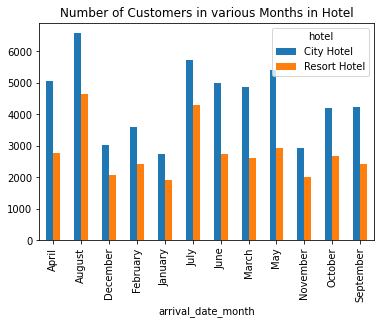

In [346]:
## plot for arrival date month and hotel
df2=df.groupby(['arrival_date_month','hotel']).size()
df2=df2.unstack()
df2.plot(kind='bar')
plt.title('Number of Customers in various Months in Hotel')
plt.show()

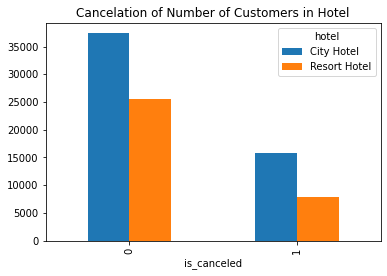

In [347]:
df3=df.groupby(['is_canceled','hotel']).size()
df3=df3.unstack()
df3.plot(kind='bar')
plt.title('Cancelation of Number of Customers in Hotel')
plt.show()

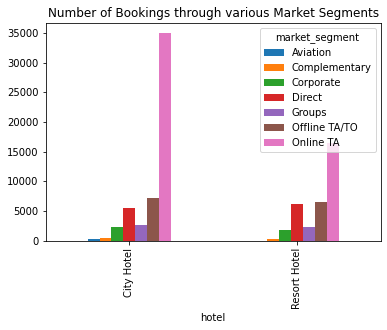

In [348]:
## plot for market segmentation and hotel
df4=df.groupby(['hotel', 'market_segment']).size()
df4=df4.unstack()
df4.plot(kind='bar')
plt.title('Number of Bookings through various Market Segments')
plt.show()

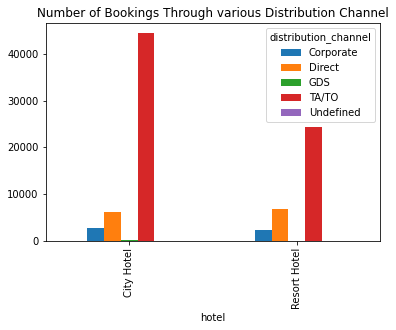

In [329]:
## ploi for the distribution channel vs hotel
df5=df.groupby(['hotel','distribution_channel']).size()
df5=df5.unstack()
df5.plot(kind='bar')
plt.title('Number of Bookings Through various Distribution Channel')
plt.show()

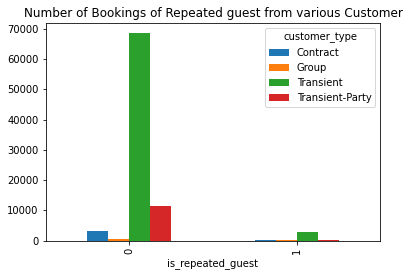

In [349]:
## plot for is repeated guest and customer type
df6=df.groupby(['is_repeated_guest','customer_type']).size()
df6=df6.unstack()
df6.plot(kind='bar')
plt.title('Number of Bookings of Repeated guest from various Customer')
plt.show()

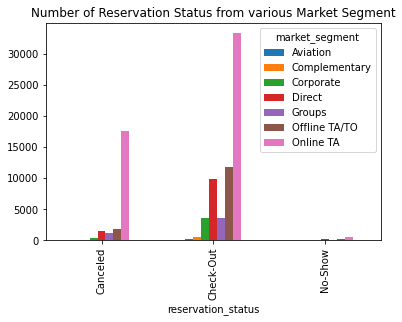

In [350]:
## plot for repeated guest and market segment
df7=df.groupby(['reservation_status','market_segment']).size()
df7=df7.unstack()
df7.plot(kind='bar')
plt.title('Number of Reservation Status from various Market Segment')
plt.show()

In [301]:
df8=pd.DataFrame(df,columns=['total_of_special_requests','babies','children','adults'])
corr_mat=df8.corr()
print (corr_mat)

                           total_of_special_requests  ...    adults
total_of_special_requests                   1.000000  ...  0.110842
babies                                      0.094570  ...  0.016232
children                                    0.044288  ...  0.022388
adults                                      0.110842  ...  1.000000

[4 rows x 4 columns]


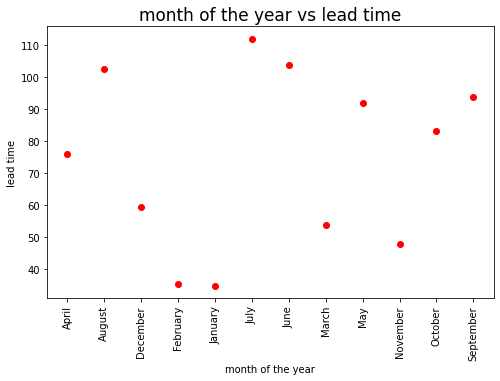

In [302]:
## plot for month of the year and lead time
plt.figure(figsize=(8,5))
plt.plot(a,'ro',color='r')
plt.xticks(rotation=90)
plt.title('month of the year vs lead time',fontsize=17)
plt.xlabel('month of the year')
plt.ylabel('lead time')
plt.show()


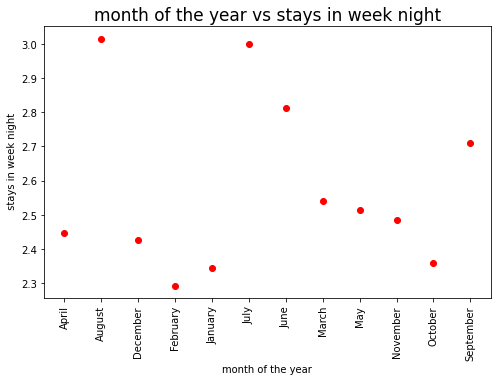

In [303]:
## plot foe month of the year vs stays in week night
plt.figure(figsize=(8,5))
plt.plot(b,'ro',color='r')
plt.xticks(rotation=90)
plt.title('month of the year vs stays in week night',fontsize=17)
plt.xlabel('month of the year')
plt.ylabel(' stays in week night')
plt.show()

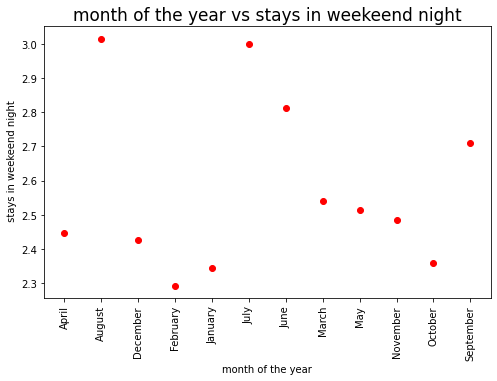

In [304]:
## plot for month of the year vs stays in weekend nights
plt.figure(figsize=(8,5))
plt.plot(b,'ro',color='r')
plt.xticks(rotation=90)
plt.title('month of the year vs stays in weekeend night',fontsize=17)
plt.xlabel('month of the year')
plt.ylabel(' stays in weekeend night')
plt.show()

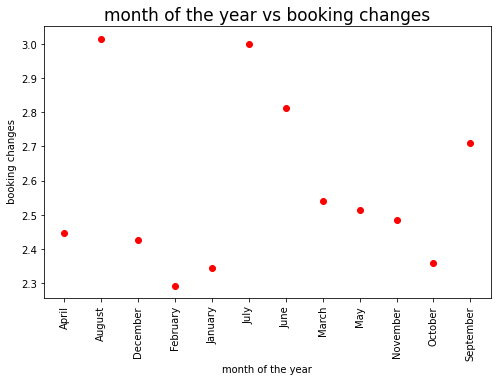

In [305]:
## plot for month of the year vs booking changes
plt.figure(figsize=(8,5))
plt.plot(b,'ro',color='r')
plt.xticks(rotation=90)
plt.title('month of the year vs booking changes',fontsize=17)
plt.xlabel('month of the year')
plt.ylabel(' booking changes')
plt.show()

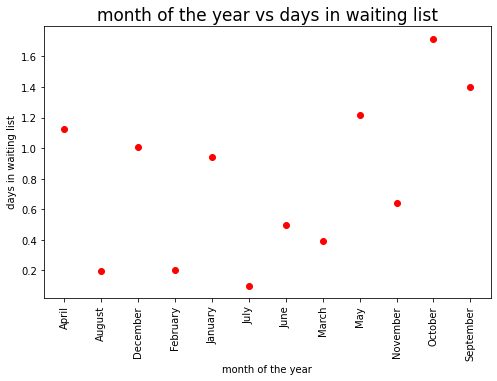

In [306]:
## plot for month of the year vs days in waiting list
plt.figure(figsize=(8,5))
plt.plot(e,'ro',color='r')
plt.xticks(rotation=90)
plt.title('month of the year vs days in waiting list',fontsize=17)
plt.xlabel('month of the year')
plt.ylabel(' days in waiting list')
plt.show()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.181671,0.000539,0.005123,0.059999,0.083229,0.080534,0.068020,-0.020589,-0.089691,0.050411,-0.050282,-0.093111,0.001423,0.127965,-0.183089,-0.119956
lead_time,0.181671,1.000000,0.100966,0.009624,0.234674,0.311213,0.137391,0.028356,-0.003705,-0.148085,0.004835,-0.076426,0.077450,0.130113,0.020443,-0.085454,0.034090
arrival_date_week_number,0.000539,0.100966,1.000000,0.093805,0.026459,0.027974,0.023861,0.013430,0.013700,-0.037222,0.006202,-0.020776,0.011612,0.013491,0.097686,0.008695,0.046395
arrival_date_day_of_month,0.005123,0.009624,0.093805,1.000000,-0.016884,-0.027513,-0.001618,0.015930,-0.000778,-0.004343,-0.008625,0.000665,0.006519,0.005384,0.021910,0.008704,-0.001716
stays_in_weekend_nights,0.059999,0.234674,0.026459,-0.016884,1.000000,0.550722,0.086360,0.027812,0.013608,-0.108257,-0.020927,-0.054265,0.049025,-0.031604,0.036282,-0.042796,0.030255
stays_in_week_nights,0.083229,0.311213,0.027974,-0.027513,0.550722,1.000000,0.094508,0.030474,0.016000,-0.114911,-0.019012,-0.057077,0.084204,0.002005,0.051431,-0.044123,0.035405
adults,0.080534,0.137391,0.023861,-0.001618,0.086360,0.094508,1.000000,0.022388,0.016232,-0.173440,-0.042238,-0.117888,-0.049204,-0.016514,0.245169,0.009245,0.110842
children,0.068020,0.028356,0.013430,0.015930,0.027812,0.030474,0.022388,1.000000,0.017523,-0.046026,-0.018992,-0.028553,0.030831,-0.020306,0.325980,0.037057,0.044288
babies,-0.020589,-0.003705,0.013700,-0.000778,0.013608,0.016000,0.016232,0.017523,1.000000,-0.013045,-0.005285,-0.008887,0.080894,-0.006799,0.022759,0.030478,0.094570
is_repeated_guest,-0.089691,-0.148085,-0.037222,-0.004343,-0.108257,-0.114911,-0.173440,-0.046026,-0.013045,1.000000,0.207105,0.447235,0.005920,-0.012737,-0.154771,0.072610,-0.001621


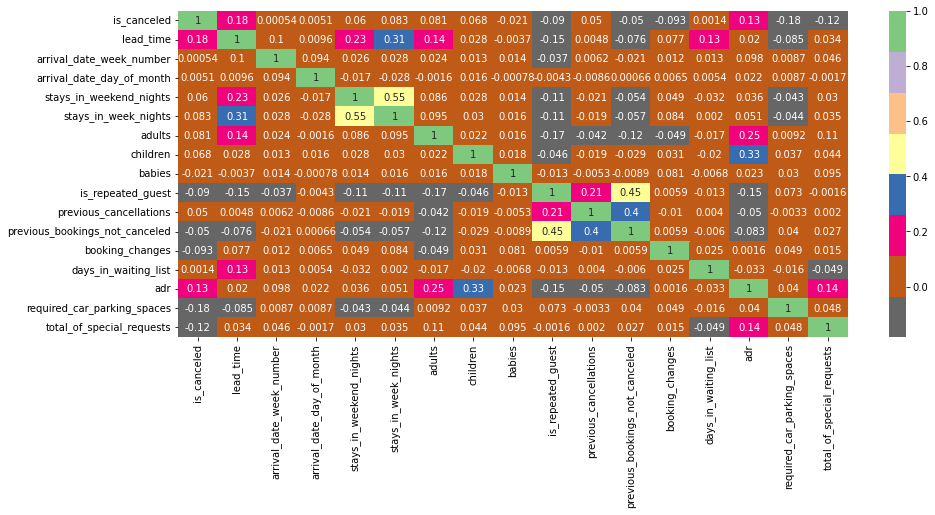

In [307]:
## heat map generation
plt.figure(figsize=(15,6))

plt.xticks(rotation=45)
sns.heatmap(df.corr(),cmap='Accent_r',annot=True)
df.corr()

***Data Modeling ***

In [308]:
df
## check for the shape
df.shape
## check for the columns of data
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

***Finding the booking cancelations of the hotels***

In [309]:
## finding the booking cancelations 
total_bookings_cancelations=df['is_canceled'].sum()
print('total number of booking cancelation:',total_bookings_cancelations)
total_bookings_cancelations_resort_hotel=df.loc[df['hotel']=='Resort Hotel']['is_canceled'].sum()
print('total number of booking cancelation of resort hotel:',total_bookings_cancelations_resort_hotel)
total_bookings_cancelations_City_hotel=df.loc[df['hotel']=='City Hotel']['is_canceled'].sum()
print('total number of booking cancelation of city hotel:',total_bookings_cancelations_City_hotel)

total number of booking cancelation: 23737
total number of booking cancelation of resort hotel: 7862
total number of booking cancelation of city hotel: 15875


***finding the percentage of the booking cancelations***

In [310]:
## find the percentage of the booking cancelations
percentage_of_total_bookings_cancelations=total_bookings_cancelations/df.shape[0]*100
print('percentage_of_total_bookings_cancelations:',percentage_of_total_bookings_cancelations)

percentage_of_total_bookings_cancelations_resort_hotel=total_bookings_cancelations_resort_hotel/df.loc[df['hotel']=='Resort Hotel']['is_canceled'].shape[0]*100
print('percentage_of_total number of booking cancelation of resort hotel:',percentage_of_total_bookings_cancelations_resort_hotel)

percentage_of_total_bookings_cancelations_City_hotel=total_bookings_cancelations_City_hotel/ df.loc[df['hotel']=='City Hotel']['is_canceled'].shape[0]*100
print('percentage_of_total number of booking cancelation of city hotel:',percentage_of_total_bookings_cancelations_City_hotel)

percentage_of_total_bookings_cancelations: 27.388424793464715
percentage_of_total number of booking cancelation of resort hotel: 23.51920545650353
percentage_of_total number of booking cancelation of city hotel: 29.81780616078137


***Create DataFrame for the booking and cancelation per month***

In [311]:
## create data frame
resort_booking_per_month=df.loc[df['hotel']=='Resort Hotel'].groupby('arrival_date_month')['hotel'].count()
resort_cancelation_per_month=df.loc[df['hotel']=='Resort Hotel'].groupby('arrival_date_month')['is_canceled'].sum()
city_booking_per_month=df.loc[df['hotel']=='City Hotel'].groupby('arrival_date_month')['hotel'].count()
city_cancelation_per_month=df.loc[df['hotel']=='City Hotel'].groupby('arrival_date_month')['is_canceled'].sum()
total_resort_cancelations_data=pd.DataFrame({'Hotel':'Resort Hotel',
                                             'month':list(resort_booking_per_month.index),
                                             'bookings':list(resort_booking_per_month.values),
                                             'cancelations':list(resort_cancelation_per_month.values)})
total_city_cancelations_data=pd.DataFrame({'Hotel':'City Hotel',
                                           'month':list(city_booking_per_month.index),
                                           'bookings':list(city_booking_per_month.values),
                                           'cancelations':list(city_cancelation_per_month.values)})
full_cancel_data=pd.concat([total_resort_cancelations_data,total_city_cancelations_data], ignore_index=True)

print(total_resort_cancelations_data)
print(total_city_cancelations_data)
print(full_cancel_data)

           Hotel      month  bookings  cancelations
0   Resort Hotel      April      2781           644
1   Resort Hotel     August      4637          1505
2   Resort Hotel   December      2061           388
3   Resort Hotel   February      2430           433
4   Resort Hotel    January      1900           267
5   Resort Hotel       July      4275          1290
6   Resort Hotel       June      2742           826
7   Resort Hotel      March      2597           458
8   Resort Hotel        May      2918           684
9   Resort Hotel   November      2003           298
10  Resort Hotel    October      2671           506
11  Resort Hotel  September      2413           563
         Hotel      month  bookings  cancelations
0   City Hotel      April      5060          1732
1   City Hotel     August      6572          2091
2   City Hotel   December      3004           970
3   City Hotel   February      3599           970
4   City Hotel    January      2723           757
5   City Hotel       Jul

In [312]:
## calculation of cancel percentage
full_cancel_data['cancel_percent']=full_cancel_data['cancelations']/full_cancel_data['bookings']*100
print(full_cancel_data['cancel_percent'])
print(full_cancel_data['month'])

0     23.157138
1     32.456330
2     18.825813
3     17.818930
4     14.052632
5     30.175439
6     30.123997
7     17.635734
8     23.440713
9     14.877683
10    18.944216
11    23.331952
12    34.229249
13    31.816799
14    32.290280
15    26.951931
16    27.800220
17    32.873362
18    30.166366
19    27.987616
20    31.978471
21    25.170532
22    26.467780
23    24.732969
Name: cancel_percent, dtype: float64
0         April
1        August
2      December
3      February
4       January
5          July
6          June
7         March
8           May
9      November
10      October
11    September
12        April
13       August
14     December
15     February
16      January
17         July
18         June
19        March
20          May
21     November
22      October
23    September
Name: month, dtype: object


In [313]:
## categorical data
order_month=['January','February','March','April','May','June','July','August','September','October','November','December']
full_cancel_data['month']=pd.Categorical(full_cancel_data['month'],categories=order_month,ordered=True)
print(order_month)
print(full_cancel_data['month'])

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
0         April
1        August
2      December
3      February
4       January
5          July
6          June
7         March
8           May
9      November
10      October
11    September
12        April
13       August
14     December
15     February
16      January
17         July
18         June
19        March
20          May
21     November
22      October
23    September
Name: month, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' <
                          'November' < 'December']


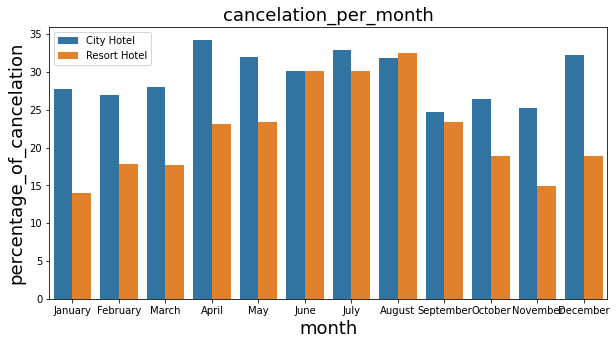

In [314]:
## plot for the month and percentage of cancelations
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='cancel_percent',hue='Hotel',hue_order=['City Hotel','Resort Hotel'],data=full_cancel_data)
plt.title('cancelation_per_month',fontsize=18)
plt.xlabel('month',fontsize=18)
plt.ylabel('percentage_of_cancelation',fontsize=18)
plt.legend()
plt.show()